In [1]:
from common import *
disable_fig_save = False 
save_loc = 'plots'
save_prefix="pathfinding"
config_common(disable_fig_save=disable_fig_save, save_loc=save_loc, save_prefix=save_prefix)
from colors import *

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import warnings

%config InlineBackend.figure_format = 'svg'

from os import path
from typing import Dict, List, Set

import matplotlib.ticker as mtick
import matplotlib as mpl
from scipy.stats.mstats import gmean
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator, ScalarFormatter, LogLocator)
import matplotlib.patches as patches
import matplotlib.patches as mpatches
from matplotlib import rc

import seaborn as sns

In [3]:
init_notebook()
figsize = (7,1.65)
fontsize = 11

In [4]:
dataf = "../../data/clwbsfencedist.csv"

In [5]:
!sha256sum $dataf

91e7e81c43265e747dcc0dfb06b524ac0241ddd6722abbee0d4d20b918a479b3  ../../data/clwbsfencedist.csv


In [6]:
df = pd.read_csv(dataf, index_col=None, names=['Distance', 'Time (ns)'])
df.index = df['Distance']
del df['Distance']

In [7]:
df.T

Distance,0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230,240,250,260,270,280,290,300,310,320,330,340,350,360,370,380,390,400,410,420,430,440,450,460,470,480,490,500,510,520,530,540,550,560,570,580,590
Time (ns),2090.76,2060.59,2087.09,2051.46,2042.81,2045.41,2023.83,2015.1,1979.56,1971.59,1936.68,1908.83,1885.83,1886.83,1840.44,1834.73,1814.1,1801.84,1768.99,1761.65,1742.52,1716.12,1708.36,1686.1,1661.99,1646.61,1622.83,1615.22,1598.18,1584.37,1571.11,1553.09,1539.6,1527.97,1518.64,1504.98,1501.49,1491.02,1480.77,1473.69,1468.55,1462.95,1459.97,1458.73,1454.67,1457.47,1451.35,1447.19,1447.41,1455.21,1446.4,1436.7,1435.54,1437.01,1438.07,1442.86,1445.84,1445.52,1434.41,1426.86


In [8]:
Fig.config(12, (8, 2))

Plot saved as `plots/pathfinding/clwbsfencedist.png`

Plot saved as `plots/pathfinding/clwbsfencedist.png`

Using pdfcrop on `plots/pathfinding/clwbsfencedist.png` with command `pdfcrop plots/pathfinding/clwbsfencedist.pdf plots/pathfinding/clwbsfencedist.pdf`

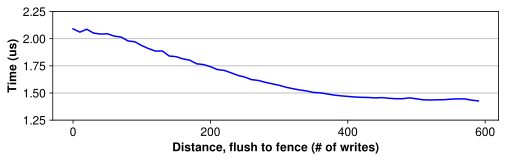

In [13]:
plt.rcParams["font.family"] = "freesans"
ax = (df/1000).plot(**Fig.get_kwargs(bar=False, legend=None, color='blue'))
f = Fig(ax)
# ax.set_ylim((1.5,3))
# ax.set_xlim((0, 790))

# f.fmt_legend()
f.fmt_label('Distance, flush to fence (# of writes)', 'Time (us)')
# f.add_bar_labels([False, True, False], precision=2, fontsize=fontsize-2, over_fig=False, alpha=0)
# f.xrot(rot=0)
f.fmt_grid(axis='y')
ax.set_yticks(np.arange(1.25, 2.26, 0.25))
save_fig('clwbsfencedist')